In [14]:
import numpy as np # linear algebra

# C_TC: Total Cost
# C_DP: Cash Depreciation
# C_SV: Cash Savings
# C_SL: Cash Salvage 
# NIBT: Net Income Before Taxes
# NIAT: Net Income After Taxes
# CFAT: Cashflow After Taxes
# NPV: Net Present Value (Present Value inflows - Present Value outflows)
# PI: Profitability Index
# K: Cost of Capital 
# t: Taxes
# IRR: INTERNAL RATE OF RETURN
# AAR: Accrual Account Return

def Depreciation_Formula(C_TC, C_SL, years):
    C_DP = (C_TC-C_SL)/years
    return(C_DP)
    
#----- 4-Rules Formula
def CFAT_Formula_4_Rules(C_SV, C_DP, t_percentage):
    t = t_percentage/100
    cash_inflow_from_depreciation = C_DP * t
    cash_inflow_from_saving = C_SV * (1-t)
    CFAT = cash_inflow_from_depreciation + cash_inflow_from_saving
    return(CFAT)

#----- 7-Steps Formula
def CFAT_Formula_7_Steps(C_SV, C_DP, t_percentage): 
    t = t_percentage/100
    NIBT = C_SV - C_DP
    Taxes = NIBT * t
    NIAT = NIBT - Taxes
    CFAT = NIAT + C_DP
    return (CFAT,NIAT)

def Payback_Formula(C_TC, CFAT):
    return (C_TC/CFAT)

def NPV_Formula(C_TC,CFAT,K_percentage,years):
    K = K_percentage/100
    Cash_Inflows = CFAT*((1-(1/(1+K))**years)/K)
    Cash_Outflows = C_TC
    NPV = - Cash_Inflows + Cash_Outflows
    return(NPV)

def PI_Formula(C_TC,CFAT,K_percentage,years):
    K = K_percentage/100
    Cash_Inflows = CFAT*((1-(1/(1+K))**years)/K)
    Cash_Outflows = C_TC
    PI = Cash_Inflows/Cash_Outflows
    return(PI)

def IRR_Formula(Payback,K_percentage,years):
    K = K_percentage/100
    difference_val = np.abs(Payback - ((1-(1/(1+K))**years)/K))
    min_difference_val = difference_val
    while difference_val>0.02:
        K +=0.01
        difference_val = np.abs(Payback - ((1-(1/(1+K))**years)/K))
        if(min_difference_val>difference_val):
            min_difference_val = difference_val
            min_K = K*100
        if(K>K_percentage/100+0.2):
            break
    return (min_difference_val,min_K)

def AAR_Formula(NIAT,C_TC):
    return(NIAT/C_TC*100)

# Question 13 of 20
Kevin Company purchased some equipment of July 1, Year 1, for 160,000. The equipment has an estimated useful life of 10 years and an estimated salvage value of 10,000. Kevin computes depreciation of a straight-line basis. How much depreciation should be recorded for the year ended December 31, Year 1?

In [15]:
C_TC = 160000
C_SL = 10000
years = 10
C_DP = Depreciation_Formula(C_TC,C_SL,years)
print("Depreciation:",C_DP)

print("total:",C_DP*years)

#July 1 --> 31 Dec: 1/2years so hald depreciation
print("for half a year",C_DP/2)

Depreciation: 15000.0
total: 150000.0
for half a year 7500.0


In [16]:
C_SV = 8000

t_percentage = 40
K_percentage = 12


CFAT_4_Rules = CFAT_Formula_4_Rules(C_SV, C_DP, t_percentage)
print("CFAT 4 Rules:", CFAT_4_Rules)
CFAT_7_Steps,NIAT = CFAT_Formula_7_Steps(C_SV, C_DP, t_percentage)
print("CFAT 7 Steps:", CFAT_7_Steps) 
if (CFAT_4_Rules==CFAT_7_Steps):
    print("GOOD")
    CFAT = CFAT_4_Rules
else:
    print("ERROR")
Payback = Payback_Formula(C_TC, CFAT)
print("Payback:",Payback)
NPV = NPV_Formula(C_TC,CFAT,K_percentage,years)
print("Net Present Value:",NPV)
if(NPV>0):
    print("NPV + so Accept")
else:
    print("NPV - so decline")
    
PI = PI_Formula(C_TC,CFAT,K_percentage,years)
print("Profitability Index:",PI)
if(PI>1):
    print("PI + so Accept")
else:
    print("PI - so decline")
    
min_difference_val,K = IRR_Formula(Payback,K_percentage,years)
print(min_difference_val,K)

AAR = AAR_Formula(NIAT,C_TC)
print("AAR:",AAR,"%")

CFAT 4 Rules: 10800.0
CFAT 7 Steps: 10800.0
GOOD
Payback: 14.814814814814815
Net Present Value: 98977.59129316264
NPV + so Accept
Profitability Index: 0.3813900544177335
PI - so decline


UnboundLocalError: local variable 'min_K' referenced before assignment

In [ ]:
#Quizz 2 Question 6 ----------------------
C_TC = 78000
C_SL = 0
C_SV = 35000
years = 6
t_percentage = 40
K_percentage = 12

C_DP = Depreciation_Formula(C_TC,C_SL,years)
print("Depreciation:",C_DP)
CFAT_4_Rules = CFAT_Formula_4_Rules(C_SV, C_DP, t_percentage)
print("CFAT 4 Rules:", CFAT_4_Rules)
CFAT_7_Steps,NIAT = CFAT_Formula_7_Steps(C_SV, C_DP, t_percentage)
print("CFAT 7 Steps:", CFAT_7_Steps) 
if (CFAT_4_Rules==CFAT_7_Steps):
    print("GOOD")
    CFAT = CFAT_4_Rules
else:
    print("ERROR")

## Quizz 2 Question 6

Jake is considering purchasing an investment costing dollars 78,000 that will save power costs of dollars 35,000 a year for each of 6 years. The investment will be depreciated on a straight-line basis with dollars 0 salvage value over 6 years. The tax rate is 40%. What are the cash flows after taxes each year?

In [17]:
#Quizz 2 Question 6 ----------------------
C_TC = 78000
C_SL = 0
C_SV = 35000
years = 6
t_percentage = 40
K_percentage = 12

C_DP = Depreciation_Formula(C_TC,C_SL,years)
print("Depreciation:",C_DP)
CFAT_4_Rules = CFAT_Formula_4_Rules(C_SV, C_DP, t_percentage)
print("CFAT 4 Rules:", CFAT_4_Rules)
CFAT_7_Steps,NIAT = CFAT_Formula_7_Steps(C_SV, C_DP, t_percentage)
print("CFAT 7 Steps:", CFAT_7_Steps) 
if (CFAT_4_Rules==CFAT_7_Steps):
    print("GOOD")
    CFAT = CFAT_4_Rules
else:
    print("ERROR")

Depreciation: 13000.0
CFAT 4 Rules: 26200.0
CFAT 7 Steps: 26200.0
GOOD


In [18]:
#------------ For the following time of exercises we need
#------------ Compound Interest Forumla (from future value find Principal amount)
def PV_Compound(FV,r_Percentage,n,t):
    r = r_Percentage/100
    discount_factor = 1/(1+(r/t))**(n*t)
    PV = FV * discount_factor
    return PV

def PV_Compound_1_Dollar_in_Years(r_Percentage,years):
    PV_1_Dollar_in_Years = []
    for year in range(1,years+1):
        PV_1_Dollar_in_Years.append(round(PV_Compound(FV=1.0,r_Percentage=r_Percentage,n=year,t=1),2))
    PV_1_Dollar_in_Years = np.array(PV_1_Dollar_in_Years)
    return PV_1_Dollar_in_Years

def CFAT_years_Function(CFAT_years,compound_interest_rates,years):
    PV_years=[]
    for year in range(0,years):
        PV_years.append(round((CFAT_years[year] * compound_interest_rates[year]),2))
    PV_years = np.array(PV_years)
    return PV_years

## Quizz 2 - Question 7
On January 1, Nat Company purchased a new machine for DOLLARS 350,000 to be depreciated over five years. It will have no salvage value at the end of five years. For book and tax purposes,
depreciation will be DOLLARS 70,000 per year. It is expected to produce annual cash flow from operations, before income taxes, of DOLLARS 100,000. Nat uses a cost of capital rate of 10%. Its income tax rate will be 21% for all years. The present value of DOLLARS 1 at 10% for five periods is 0.62. The present value of an ordinary annuity of DOLLARS 1 at 10% for five periods is 3.79. The net present value for the machine is

In [19]:
#Quizz 2 Question 7 ----------------------
C_TC = 350000
C_SL = 0
C_SV = 100000
years = 5
t_percentage = 21
K_percentage = 10

C_DP = Depreciation_Formula(C_TC,C_SL,years)
print("Depreciation:",C_DP)
CFAT,NIAT = CFAT_Formula_7_Steps(C_SV, C_DP, t_percentage)
print("CFAT annualy:", CFAT) 
CFAT_years = [float(CFAT),float(CFAT),float(CFAT),float(CFAT),float(CFAT)]
print("CFATs during Years:",CFAT_years)

compound_interest_rates = PV_Compound_1_Dollar_in_Years(10,years)
print("Rates:",compound_interest_rates)
PV_years = CFAT_years_Function(CFAT_years,compound_interest_rates,years)
print("Present Values per Year:",PV_years)

NPV = -C_TC + sum(PV_years)
print("Net Present Value:",NPV)

Depreciation: 70000.0
CFAT annualy: 93700.0
CFATs during Years: [93700.0, 93700.0, 93700.0, 93700.0, 93700.0]
Rates: [0.91 0.83 0.75 0.68 0.62]
Present Values per Year: [85267. 77771. 70275. 63716. 58094.]
Net Present Value: 5123.0


# Question 7 of 20

On January 1, Manning Company purchased a new machine for 120,000 to be depreciated over five years. It will have no salvage value at the end of five years. For book and tax purposes, depreciation will be 24,000 per year. It is expected to produce annual cash flow from operations, before income taxes, of 50,000. Manning uses a discount rate of 12 percent. Its income tax rate will be 40percent for all years. The present value of $1 at 12% for five periods is 0.57. The present value of an ordinary annuity of 1 at 12percent for five periods is 3.61. The net present value of the machine is

In [25]:
C_TC = 120000
C_SL = 0
C_SV = 50000
years = 5
t_percentage = 12
K_percentage = 10

C_DP = Depreciation_Formula(C_TC,C_SL,years)
print("Depreciation:",C_DP)
CFAT,NIAT = CFAT_Formula_7_Steps(C_SV, C_DP, t_percentage)
print("CFAT annualy:", CFAT) 
CFAT_years = [float(CFAT),float(CFAT),float(CFAT),float(CFAT),float(CFAT)]
print("CFATs during Years:",CFAT_years)

compound_interest_rates = PV_Compound_1_Dollar_in_Years(10,years)
print("Rates:",compound_interest_rates)
PV_years = CFAT_years_Function(CFAT_years,compound_interest_rates,years)
print("Present Values per Year:",PV_years)

NPV = -C_TC + sum(PV_years)
print("Net Present Value:",NPV)

Depreciation: 24000.0
CFAT annualy: 46880.0
CFATs during Years: [46880.0, 46880.0, 46880.0, 46880.0, 46880.0]
Rates: [0.91 0.83 0.75 0.68 0.62]
Present Values per Year: [42660.8 38910.4 35160.  31878.4 29065.6]
Net Present Value: 57675.20000000001


## Quizz 2 - Question 8

Electric Company is planning to spend DOLLARS 74,000 for a new machine, to be depreciated on the straight-line basis over ten years with no salvage value. The related cash flow from operations, net of income taxes, is expected to be DOLLARS 10,000 a year for each of the first five years and DOLLARS 8,000 for each of the next five years. What is the payback period?

In [20]:
# ------------ About the payback, because I have different Cash flow each year
# ------------ I have to add my cashflows until I reach the Total Cost (C_TC)
def Payback_Formula_With_Different_Annual_CFAT(C_TC,CFAT_years,years):
    cumulative_CFAT = 0
    year_of_payback = 0
    needed_CFAT_from_last_year = 0
    for year in range(0,years):
        if(cumulative_CFAT<C_TC):
            cumulative_CFAT +=CFAT_years[year]
            year_of_payback = year+1
            #print("year:",year_of_payback,"current cumulative CFAT:",cumulative_CFAT)
        else:
            #Even if its accurate the value will be 1
            needed_CFAT_from_last_year = CFAT_years[year_of_payback-1] - (cumulative_CFAT - C_TC)
            #print("Needed from Last year:",needed_CFAT_from_last_year)
            break
    accurate_year_of_payback = (year_of_payback-1) + needed_CFAT_from_last_year/CFAT_years[year_of_payback-2]
    return accurate_year_of_payback

In [21]:
#Quizz 2 Question 8 ----------------------
C_TC = 74000
C_SL = 0
years = 10
C_DP = Depreciation_Formula(C_TC,C_SL,years)
print("Depreciation:",C_DP)

CFAT_years_1_5 = 10000
CFAT_years_6_10 = 8000

# First I crearte a list of all the cashflow values from different years
CFAT_years = [CFAT_years_1_5,CFAT_years_1_5,CFAT_years_1_5,CFAT_years_1_5,CFAT_years_1_5,
              CFAT_years_6_10,CFAT_years_6_10,CFAT_years_6_10,CFAT_years_6_10,CFAT_years_6_10]
print(CFAT_years) 

accurate_year_of_payback = Payback_Formula_With_Different_Annual_CFAT(C_TC,CFAT_years,years)
print("Accurate Years of Payback:",accurate_year_of_payback)

Depreciation: 7400.0
[10000, 10000, 10000, 10000, 10000, 8000, 8000, 8000, 8000, 8000]
Accurate Years of Payback: 8.0


## Quizz 2 - Question 9

The Cameron Company invested DOLLARS 86,352 in a four-year machine. The machine's net present value was DOLLARS 4,000 using a 15% cost of capital. Info on cash flows and present value factors follows:
What is the expected cash flow, net of taxes, in year four?

In [22]:
#Quizz 2 Question 9 ----------------------
C_TC = 86352
C_SL = 0
C_SV = 100000
years = 4
t_percentage = 21
K_percentage = 15

CFAT_year_1 = 32000
CFAT_year_2 = 28000
CFAT_year_3 = 30000
NPV = 4000
PV_year_1 = CFAT_year_1*0.87
PV_year_2 = CFAT_year_2*0.76
PV_year_3 = CFAT_year_3*0.66
print("PV year 1:",PV_year_1,"PV year 2:",PV_year_2,"PV year 3:",PV_year_3)

PV_year_4 = NPV + C_TC - (PV_year_1+PV_year_2+PV_year_3)
CFAT_year_4 = PV_year_4 / 0.57
print("Year 4 CFAT:",CFAT_year_4)

PV year 1: 27840.0 PV year 2: 21280.0 PV year 3: 19800.0
Year 4 CFAT: 37600.0


## Quizz 2 - Question 10

Prep, Inc. is planning to invest DOLLARS 160,000 in a ten-year project. Prep estimates that the annual cash inflow, net of income taxes, from this project will be DOLLARS 24,000. Prep's required rate of return on investments of this type is 10%. Information on present value factors is as follows:

In [23]:
import matplotlib.pyplot as plt

#------------- Returns a list of all the possible Cost of Capital 
def IRR_Formula_without_K(Payback,years):
    K = 0.01
    Ks = []
    Differences = []
    min_difference_val = 100
    while K<1:
        difference_val = np.abs(Payback - ((1-(1/(1+K))**years)/K))
        Differences.append(difference_val)
        Ks.append(K)
        K +=0.01
    return (Ks,Differences)

#------------- Find the min of a list
def Min_Index_of_List(mylist):
    min_val = max(mylist)
    min_index = 0
    for i in range(0,len(mylist)):
        if mylist[i]<min_val:
            min_val = mylist[i]
            min_index = i
    return(min_val,min_index)

Depreciation: 16000.0
CFATs during Years: [24000, 24000, 24000, 24000, 24000, 24000, 24000, 24000, 24000, 24000]
Rates: [0.91 0.83 0.75 0.68 0.62 0.56 0.51 0.47 0.42 0.39]
Present Values per Year: [21840. 19920. 18000. 16320. 14880. 13440. 12240. 11280. 10080.  9360.]
Accurate Years of Payback: 6.666666666666667


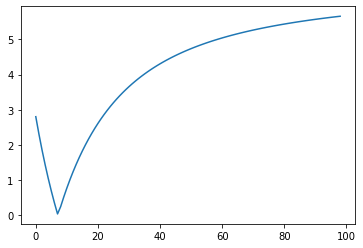

IRR: 8.0 %


In [24]:
#Quizz 2 Question 10 ----------------------
C_TC = 160000
C_SL = 0
years = 10
C_DP = Depreciation_Formula(C_TC,C_SL,years)
print("Depreciation:",C_DP)

CFAT = 24000
CFAT_years = [(CFAT),(CFAT),(CFAT),(CFAT),(CFAT),(CFAT),(CFAT),(CFAT),(CFAT),(CFAT)]
print("CFATs during Years:",CFAT_years)
compound_interest_rates = PV_Compound_1_Dollar_in_Years(10,years)
print("Rates:",compound_interest_rates)
PV_years = CFAT_years_Function(CFAT_years,compound_interest_rates,years)
print("Present Values per Year:",PV_years)

accurate_year_of_payback = Payback_Formula_With_Different_Annual_CFAT(C_TC,CFAT_years,years)
print("Accurate Years of Payback:",accurate_year_of_payback)

Ks,Differences = IRR_Formula_without_K(accurate_year_of_payback,years)
plt.plot(Differences)
plt.show()
min_value, min_index = Min_Index_of_List(Differences)
IRR = Ks[min_index]*100
print("IRR:",IRR,"%")

Depreciation: 8400.0
CFATs during Years: [12000, 12000, 12000, 12000, 12000, 12000, 10000, 10000, 10000, 10000]
Rates: [0.91 0.83 0.75 0.68 0.62 0.56 0.51 0.47 0.42 0.39]
Present Values per Year: [10920.  9960.  9000.  8160.  7440.  6720.  5100.  4700.  4200.  3900.]
Accurate Years of Payback: 7.2


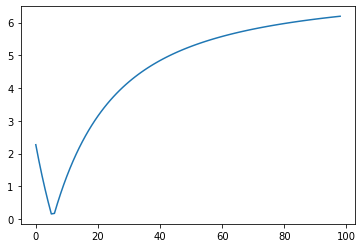

IRR: 6.000000000000001 %


In [26]:
#Quizz 2 Question 10 ----------------------
C_TC = 84000
C_SL = 0
years = 10
C_DP = Depreciation_Formula(C_TC,C_SL,years)
print("Depreciation:",C_DP)

CFAT = 12000
CFAT_years = [(CFAT),(CFAT),(CFAT),(CFAT),(CFAT),(CFAT),(CFAT)-2000,(CFAT)-2000,(CFAT)-2000,(CFAT)-2000]
print("CFATs during Years:",CFAT_years)
compound_interest_rates = PV_Compound_1_Dollar_in_Years(10,years)
print("Rates:",compound_interest_rates)
PV_years = CFAT_years_Function(CFAT_years,compound_interest_rates,years)
print("Present Values per Year:",PV_years)

accurate_year_of_payback = Payback_Formula_With_Different_Annual_CFAT(C_TC,CFAT_years,years)
print("Accurate Years of Payback:",accurate_year_of_payback)

Ks,Differences = IRR_Formula_without_K(accurate_year_of_payback,years)
plt.plot(Differences)
plt.show()
min_value, min_index = Min_Index_of_List(Differences)
IRR = Ks[min_index]*100
print("IRR:",IRR,"%")